# EAS2655: Week 9 Homework 
Pengfei Liu
pengfei.liu@eas.gatech.edu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs
import scipy.stats as stats


## Load and process NINO3.4 data

### Load data 

In [2]:
 # data loading
# Nino3.4 index downloaded from:
# https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni

# df=pd.read_csv('./nino34_1870_2020.txt', delim_whitespace=True, header=None)
# alternatively, you could use the following command to read the whitespece separated data file
# df=pd.read_csv('./nino34_1870_2020.txt', delimiter=r"\s+", header=None)

df=pd.read_csv('./nino34_1870_2020.txt', delimiter="\t", header=None)

# replace invalid values with NaN 
df=df.replace(-99.99,np.nan)
# convert dataframe to numpy matrix
data=df.values

year=data[:,0] # time
nino34=data[:,1:] # 
tr=(1948,2021)
tind=((year>=tr[0])&(year<tr[1]))

year_sel=year[tind]
nino34_sel=nino34[tind,:]
(ny,nm)=np.shape(nino34_sel)

nino34_sel


array([[26.63, 27.13, 27.89, 28.02, 28.17, 27.75, 27.16, 26.85, 26.73,
        26.06, 26.35, 26.96],
       [26.12, 27.02, 26.7 , 27.96, 27.79, 26.97, 26.84, 26.56, 26.1 ,
        26.01, 25.33, 25.39],
       [25.53, 25.26, 26.18, 26.86, 26.56, 26.82, 26.14, 26.24, 25.65,
        25.9 , 25.27, 25.55],
       [25.45, 26.02, 26.48, 27.6 , 27.77, 27.6 , 27.88, 27.77, 27.42,
        27.52, 27.44, 27.3 ],
       [26.97, 27.  , 27.3 , 28.18, 27.48, 27.03, 26.63, 26.45, 26.4 ,
        26.7 , 26.33, 26.04],
       [26.94, 27.  , 27.48, 28.54, 28.21, 28.1 , 27.42, 26.91, 27.42,
        26.84, 26.96, 26.74],
       [26.97, 26.98, 27.27, 27.45, 27.34, 26.88, 26.2 , 25.8 , 25.72,
        25.82, 25.49, 25.79],
       [25.92, 25.98, 26.46, 26.82, 26.64, 26.49, 25.91, 25.96, 25.42,
        25.14, 24.75, 25.07],
       [25.35, 25.79, 26.32, 26.99, 27.28, 26.85, 26.28, 26.06, 25.84,
        26.04, 25.64, 26.01],
       [26.02, 26.52, 27.34, 28.19, 28.31, 28.22, 27.91, 27.66, 27.28,
        27.48, 27.74

### Calculate anomaly to remove seasonal cycle

In [6]:
# climatological mean
nino34_mean=np.mean(nino34_sel,axis=0)
nino34_mean

# select a month 
mon=7

nino34_July=nino34_sel[:,mon-1]
nino34_July

nino34_ano_July=nino34_July-nino34_mean[mon-1]
nino34_ano_July


array([ 0.00657534, -0.31342466, -1.01342466,  0.72657534, -0.52342466,
        0.26657534, -0.95342466, -1.24342466, -0.87342466,  0.75657534,
        0.10657534, -0.20342466, -0.17342466, -0.25342466, -0.23342466,
        0.79657534, -0.57342466,  0.87657534,  0.29657534, -0.03342466,
        0.38657534,  0.16657534, -0.90342466, -0.56342466,  0.90657534,
       -1.07342466, -0.57342466, -1.16342466,  0.22657534,  0.51657534,
       -0.40342466, -0.13342466,  0.09657534, -0.36342466,  0.70657534,
       -0.04342466, -0.33342466, -0.53342466,  0.22657534,  1.40657534,
       -1.46342466, -0.39342466,  0.21657534,  0.68657534,  0.34657534,
        0.39657534,  0.22657534,  0.10657534, -0.07342466,  1.67657534,
       -0.66342466, -0.76342466, -0.50342466,  0.08657534,  0.64657534,
        0.21657534,  0.48657534,  0.06657534,  0.09657534, -0.29342466,
        0.03657534,  0.75657534, -0.81342466, -0.15342466,  0.50657534,
       -0.21342466,  0.20657534,  1.62657534, -0.18342466,  0.28

## load and process NCEP data

In [7]:
# load netcdf data
fn='./air.mon.mean.nc'
ds=xr.open_dataset(fn)
# select time range
TMP=ds.air.sel(time=slice("1948-01-01","2020-12-31"))
TMP


<xarray.DataArray 'air' (time: 876, lat: 73, lon: 144)>
[9208512 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-01-01 1948-02-01 ... 2020-12-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

In [8]:
# get July data
TMP_July=TMP.sel(time=TMP["time.month"]==7)
TMP_July


<xarray.DataArray 'air' (time: 73, lat: 73, lon: 144)>
[767376 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2020-07-01
Attributes:
    long_name:     Monthly Mean Air Temperature at sigma level 0.995
    valid_range:   [-2000.  2000.]
    units:         degC
    precision:     1
    var_desc:      Air Temperature
    level_desc:    Surface
    statistic:     Mean
    parent_stat:   Individual Obs
    dataset:       NCEP Reanalysis Derived Products
    actual_range:  [-73.78001  42.14595]

### calculate correlation and test whether the correlations are significant


In [9]:
def regrcorr3(X,Y,CL):
    C=np.cov(X,Y)
    # slope
    a=np.empty(2)
    a[0]=C[0,1]/C[0,0]
    # intercept
    a[1]=np.mean(Y)-a[0]*np.mean(X)
    # correlation coefficient
    r=C[0,1]/np.sqrt(C[0,0]*C[1,1])    
    # sample size
    N=np.size(Y)    
    # lag-1 autocorrelation for Y
    y0=Y[0:-1]
    y1=Y[1:]
    Cy=np.cov(y0,y1)
    r1=Cy[0,1]/np.sqrt(Cy[0,0]*Cy[1,1])
    
    # lag-1 autocorrelation for Y
    x0=X[0:-1]
    x1=X[1:]
    Cx=np.cov(x0,x1)
    r2=Cx[0,1]/np.sqrt(Cx[0,0]*Cx[1,1])    
    
    # effective sample size
    Neff=N*(1-r1*r2)/(1+r1*r2)
    Neff=min(N,Neff)
    
    # calculate tcrit (two-tailed)
    tcrit=stats.t.ppf((1+CL)/2,Neff-2)
    
    # SE of regression
    Y_pred=a[0]*X+a[1]
    err2=sum(np.square(Y-Y_pred))/(Neff-2)
    SE2=err2/sum(np.square(X-np.mean(X)))
    SE=np.sqrt(SE2)
    CI_slope=tcrit*SE
    
    # SE of correlation coefficient
    SE_r=np.sqrt((1-r**2)/(Neff-2))
    
    # confidence interval for r
    CI_r=tcrit*SE_r  
    
    
    return a,r,CI_slope,CI_r  



In [13]:
da=TMP_July
nlon=da.lon.size
nlat=da.lat.size

# calculate correlation coefficient
r_mat=np.empty((nlat,nlon))
slope=np.empty((nlat,nlon))

r_CI=np.empty((nlat,nlon))
slope_CI=np.empty((nlat,nlon))
# r_mat[:]=np.nan
y=nino34_ano_July

# CL
CL=0.95

for ii in np.arange(0,nlon):
    print(ii)
    for jj in np.arange(0,nlat):
        x=TMP_July.isel(lat=jj,lon=ii).values
        a,r,CI_slope,CI_r=regrcorr3(x,y,CL)
        r_mat[jj,ii]=r
        slope[jj,ii]=a[0]
        r_CI[jj,ii]=CI_r
        slope_CI[jj,ii]=CI_slope


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143


In [19]:
# if significant, trdsig=1; otherwise, trdsig=0;
trdsig=np.zeros((nlat,nlon))
trdsig[slope_CI<np.abs(slope)]=1

rsig=np.zeros((nlat,nlon))
rsig[r_CI<np.abs(r_mat)]=1



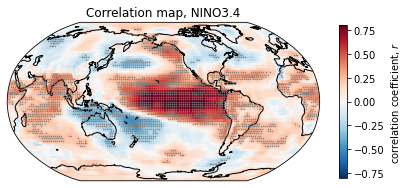

In [25]:
# test whether correlations are significant
ind_r=(rsig==1)

X=da.lon.values
Y=da.lat.values
Z=r_mat

X_mat,Y_mat=np.meshgrid(X,Y)

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)


fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
cf=plt.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),cmap='RdBu_r',vmin=-0.8,vmax=0.8,rasterized=True)
fig.colorbar(cf, ax=ax,shrink=0.7, label='correlation coefficient, $\itr$')

plt.plot(X_mat[ind_r],Y_mat[ind_r], '.',color='gray',markersize=1.0, transform=ccrs.PlateCarree())

ax.set_title('Correlation map, NINO3.4')

fn='Fig_ncep_nino34_correlation_plot_July_sig'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)

plt.show()